## Logistic Regression

In this notebook, we will train a logistic regression model as a baseline on the IMDb movie reviews dataset and evaluate its performance.




### 1. Loading the Dataset

In [7]:
import pandas as pd

# Load train dataset
train_df = pd.read_csv('data/train_set.csv')
print(train_df.head())

X_train = train_df['text']
y_train = train_df['sentiment']

# Load test dataset
test_df = pd.read_csv('data/test_set.csv')
print(test_df.head())

X_test = test_df['text']
y_test = test_df['sentiment']

                                                text  sentiment
0  clint eastwood play wound union soldier find g...          1
1  rent movie sound pretty interesting horror mov...          0
2  great example could great film great idea turn...          0
3  ok admit watch movie mystery science theater 3...          0
4  movie absolutely terrible not act awful sleep ...          0
                                                text  sentiment
0  attack killer tomato parody bad monster movie ...          0
1  pam grier star coffy nurse seek revenge drug d...          0
2  movie never imagine richard attenborough could...          1
3  patricia hunter oh professor also make habit c...          0
4  go generous give 3 live huntsville great see w...          0


### 2. Feature Extraction

This section of code performs feature extraction for text data using two different techniques: Bag of Words (BoW) and TF-IDF (Term Frequency-Inverse Document Frequency). The goal is to convert raw text data into numerical features that can be used by machine learning models for sentiment analysis.

Technique 1: Bag of Words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
# ngram_range to capture phrases for sentiment, especially negatations
# min_df removes extremely rare words in less than 2 reviews
# max_df removes words that appear in more than 90% of reviews; likely corpus-specific stopwords (eg. movies, films) that may not help distinguish sentiments
# binary = True: focues on whether a word appears in a document rather than how many times it occurs, more balanced feature contributions

bow_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=2, max_df=0.9)

# Fit and transform the training data
X_train_BoW = bow_vectorizer.fit_transform(X_train)
X_test_BoW = bow_vectorizer.transform(X_test)

Technique 2: Term Frequency - Inverse Document Frequency (TF-IDF)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ngram_range to capture phrases for sentiment, especially negatations
# min_df removes extremely rare words in less than 2 reviews
# max_df removes words that appear in more than 90% of reviews; likely corpus-specific stopwords (eg. movies, films) that may not help distinguish sentiments

vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=2, max_df=0.9)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### 3. Model Training and Cross-Validation (Logistic Regression)

In this section, the performance of Logistic Regression is compared across two different text representations: (1) Bag-of-Words (BoW) and (2) TF-IDF. Each model is evaluated using 5-fold stratified cross-validation. Final models are trained on the full training data.

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate

# Initialise stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
# Initialise logistic regression on BoW
lr_bow = LogisticRegression(max_iter=1000) # performs L2 regularisation as well

# Perform 5-fold stratified cross-validation
lr_bow_scores = cross_validate(lr_bow, X_train_BoW, y_train, scoring='accuracy', cv=cv)
lr_bow_scores_mean = np.mean(lr_bow_scores['test_score'])
print('CV Accuracy: {0:.3f}'.format(lr_bow_scores_mean))

# Train final model on BoW training data
lr_bow.fit(X_train_BoW, y_train)

CV Accuracy: 0.900


LogisticRegression(max_iter=1000)

In [24]:
# Initialise logistic regression on TF-IDF
lr_tfidf = LogisticRegression(max_iter=1000) # performs L2 regularisation as well

# Perform 5-fold stratified cross-validation
lr_tfidf_scores = cross_validate(lr_tfidf, X_train_vec, y_train, scoring='accuracy', cv=cv)
lr_tfidf_mean_accuracy = np.mean(lr_tfidf_scores['test_score'])
print('CV Accuracy: {0:.3f}'.format(lr_tfidf_mean_accuracy))

# Train final model on TF-IDF training data
lr_tfidf.fit(X_train_vec, y_train)

CV Accuracy: 0.891


LogisticRegression(max_iter=1000)

### 4. Model Evaluation (on test set)

In this section, final models are evaluated on the test set for classification performance using classification report and confusion matrix.


BoW Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.90      0.90      5000
    positive       0.90      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion Matrix:


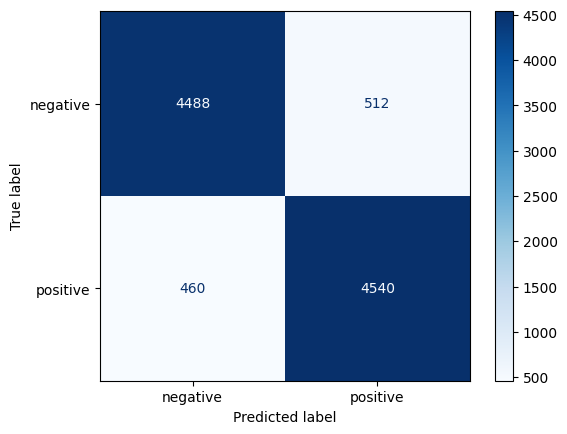

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# BoW evaluation
y_pred_bow = lr_bow.predict(X_test_BoW)

# Classification report for BoW
print("\nBoW Classification Report:")
print(classification_report(y_test, y_pred_bow, target_names=["negative", "positive"]))
print(f"\n{'='*40}")

# Confusion matrix visualization
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_bow)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["negative", "positive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


TF-IDF Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion Matrix:


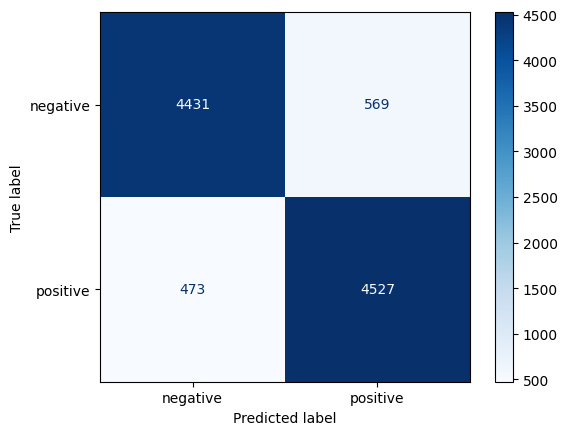

In [26]:
# TF-IDF evaluation
y_pred_vec = lr_tfidf.predict(X_test_vec)

# Classification report for TF-IDF
print("\nTF-IDF Classification Report:")
print(classification_report(y_test, y_pred_vec, target_names=["negative", "positive"]))
print(f"\n{'='*40}")

# Confusion matrix visualization
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_vec)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["negative", "positive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The evaluation of the two versions of logistic regression — BoW and TF-IDF — shows similar performance across key metrics, including accuracy, precision, recall, and F1-score. All metrics achieve around 90% on the unseen dataset, demonstrating strong generalization ability.